In [ ]:
# Fundamental classes
import numpy as np
import pandas as pd
import tensorflow as tf
import os

# Performance Plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Keras Library Importation
from keras import layers
from keras import models

# Data Importation And Traing Model Selection
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.utils import to_categorical
from keras._tf_keras.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Load the training data from a CSV file
train_data = pd.read_csv('/content/mnist/mnist_train.csv')

print('Printing The Shape Of The Training Data:')
print(train_data.shape)


print('\nSelecting The First Five Rows Of Traing Data:')
train_data.head()

Printing The Shape Of The Training Data:
(31547, 785)

Selecting The First Five Rows Of Traing Data:


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_data = pd.read_csv("/content/mnist/mnist_test.csv")

print('Printing The Shape Of The Testing Data:')
print(test_data.shape)

print('\n')

print('Selecting The First Five Rows Of Testing Data:')
test_data.head()


Printing The Shape Of The Testing Data:
(10000, 785)


Selecting The First Five Rows Of Testing Data:


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Training Data Separation
X_train=train_data.drop(labels=["label"],axis=1)
Y_train=train_data["label"]

# Testing Data Separation
X_test=test_data.drop(labels=["label"],axis=1)
Y_test=test_data["label"]

print('Traing Count Per Lablel: \n')
Y_train.value_counts()

Traing Count Per Lablel: 



,count
label,
1,3603
7,3270
3,3219
9,3166
6,3126
0,3119
2,3103
4,3076
8,3027


In [ ]:
img = X_train.iloc[0].values.reshape(28,28)
img.shape

(28, 28)

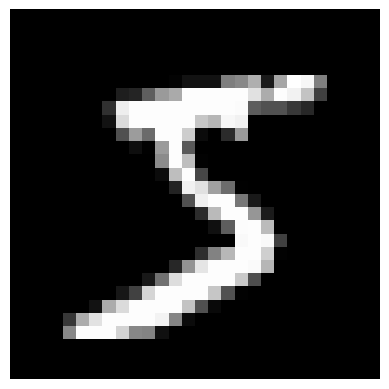

In [ ]:
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show()

In [ ]:
# Normalize the pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
# Reshape Data
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [ ]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (31547, 28, 28, 1)
X_test shape:  (10000, 28, 28, 1)


In [ ]:
# Lable Encoding
# Selecting 10 classes because we our data has 10 lables possible
Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical(Y_test, num_classes = 10)

In [ ]:
# Train Test Split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)

In [ ]:
print('Data:')
print("Training Data: ", X_train.shape)
print("Validation Data: ", X_val.shape)

Data:
Training Data:  (28392, 28, 28, 1)
Validation Data:  (3155, 28, 28, 1)


In [ ]:
print('\nLables:')
print("Training Labels: ", Y_train.shape)
print("Validation Labels: ", Y_val.shape)


Lables:
Training Labels:  (28392, 10)
Validation Labels:  (3155, 10)


In [ ]:
# Sequential model for this task
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'Same', input_shape = X_train.shape[1:]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# MaxPooling Layer: Down-sample the feature maps
model.add(MaxPooling2D((2, 2)))

In [ ]:
# Add a Dropout layer to prevent overfitting by randomly setting input units to 0
model.add(Dropout(0.15))

In [ ]:
# Add More Filteer
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

In [ ]:
# Flatten the 2D matrix into a 1D vector to connect to fully connected layers
model.add(Flatten())

In [ ]:
# Dropout to reduce overfitting
model.add(Dense(128, activation='relu'))

In [ ]:
# Dropout to reduce overfitting
model.add(Dropout(0.25))

In [ ]:
# Final layer with softmax activation for classification into 10 categories (digits 0–9)
model.add(Dense(10, activation='softmax'))

In [ ]:
# Define the optimizer, loss function, and metrics to track.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Model display
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,939,530 (7.40 MB)

 Trainable params: 1,939,530 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 35
    history = model.fit(X_train, Y_train, batch_size=128, epochs=epochs, validation_data=(X_test, Y_test))

Epoch 1/35
222/222 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.7613 - loss: nan - val_accuracy: 0.1009 - val_loss: nan
Epoch 2/35
222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.0964 - loss: nan - val_accuracy: 0.1009 - val_loss: nan
Epoch 3/35
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0985 - loss: nan - val_accuracy: 0.1009 - val_loss: nan
Epoch 4/35
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.1001 - loss: nan - val_accuracy: 0.1009 - val_loss: nan
Epoch 5/35
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0980 - loss: nan - val_accuracy: 0.1009 - val_loss: nan
Epoch 6/35
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.1007 - loss: nan - val_accuracy: 0.1009 - val_loss: nan
Epoch 7/35
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.1019 - loss: nan - val_accuracy: 0.1009 - val_loss: nan
Epoch 8/35
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.1026 - loss: nan - val_accuracy: 0.1009 - val_loss: nan
Epoch 9/35
222

In [ ]:
test_scores = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 3s - 11ms/step - accuracy: 0.1009 - loss: nan


In [ ]:
loss_cnn = test_scores[0]*100
accuracy_cnn =  test_scores[1]*10

In [ ]:
print('Test loss:', loss_cnn)
print('Test accuracy:', accuracy_cnn)

Test loss: nan
Test accuracy: 1.0090000182390213


In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

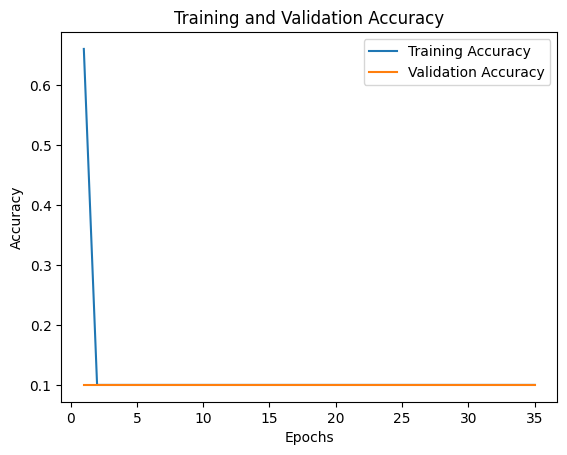

In [ ]:
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.show()

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

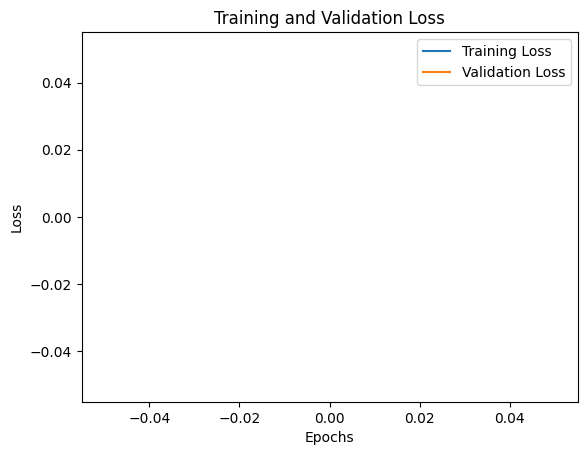

In [ ]:
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions on the validation dataset
pred = np.argmax(model.predict(X_val), axis=-1)  # Get predicted labels

99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
# Convert Y_val from one-hot encoded to class labels (if needed)
y_val_labels = np.argmax(Y_val, axis=-1)

In [ ]:
# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val_labels, pred)

In [ ]:
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation Accuracy: 9.45%


In [ ]:
model.save('mnist_model.h5')